# Logistic Regression and Count Vectorizer (Gender Prediction)



## Penjelasan Kolom:

- nama = nama pemilih 
- jenis_kelamin = jenis kelamin pemilih (label)

## A. Data Preparation

### A.1 Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
sns.set(style='darkgrid', font_scale=1.1)

### A.2 Load Data

In [3]:
try:
    df = pd.read_csv('data-pemilih-kpu.csv')
    print("Berhasil membaca csv")
except Exception as e:
    print("Gagal membaca data")

Berhasil membaca csv


### A.3 Melihat 5 Data Teratas dan 5 Data Terbawah

In [4]:
df.head()

,nama,jenis_kelamin
0,ERWIN TJAHJONO,Laki-Laki
1,DAVIANDRIE ANDIKA BAHROENY,Laki-Laki
2,ELAN KURNIAWAN,Laki-Laki
3,AYU DWI CAHYANING MUKTI,Perempuan
4,WAHYOEDIN,Laki-Laki


In [5]:
df.tail()

,nama,jenis_kelamin
13132,HERMANSYAH,Laki-Laki
13133,SITA.HJ,Perempuan
13134,MASNI TAMBUNAN,Perempuan
13135,MARJANEDI,Laki-Laki
13136,NGALIMAN,Laki-Laki


### A.4 Melihat Informasi Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13137 entries, 0 to 13136
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   nama           12950 non-null  object
 1   jenis_kelamin  12950 non-null  object
dtypes: object(2)
memory usage: 205.4+ KB


### A.5 Melihat Dimensi Data

In [7]:
df.shape

(13137, 2)

### A.6 Cek Data Duplikat

In [8]:
df.duplicated().sum()

np.int64(1312)

In [9]:
df.drop_duplicates(inplace=True)

### A.7 Cek Data Hilang

In [10]:
df.isna().sum()

nama             1
jenis_kelamin    1
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(11824, 2)

## B. Data Preprocessing

### B.1 Cek Outliers

## C. Exploratory Data Analysis (EDA)

### C.1 Visualisasi Label

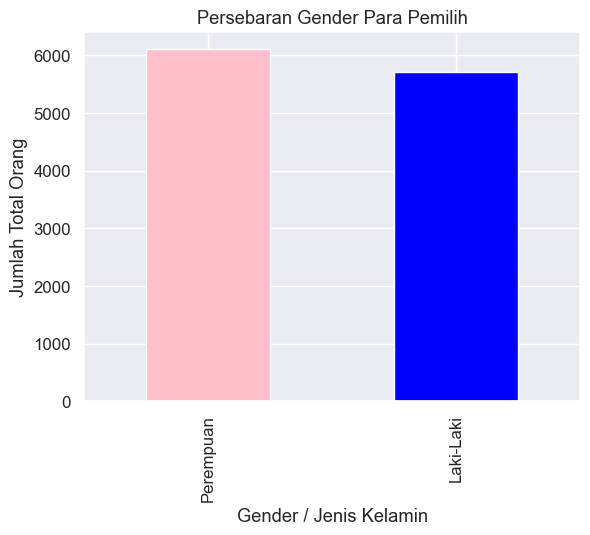

In [ ]:
df['jenis_kelamin'].value_counts().plot(kind='bar', color=['pink', 'blue'])
plt.title("Persebaran Gender Para Pemilih")
plt.xlabel("Gender / Jenis Kelamin")
plt.ylabel("Jumlah Total Orang")
plt.show()

In [ ]:
df['jenis_kelamin'].value_counts(normalize=True * 100)

jenis_kelamin
0    0.516238
1    0.483762
Name: proportion, dtype: float64

### C.2 Visualisasi Korelasi

In [ ]:
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1.1)

### C.3 Encoding/Mapping

In [ ]:
df.columns

Index(['nama', 'jenis_kelamin'], dtype='object')

In [ ]:
df['jenis_kelamin'].unique()

array(['Laki-Laki', 'Perempuan'], dtype=object)

In [ ]:
gender_mapping = {'Laki-Laki' : 1, 'Perempuan' : 0}

df['jenis_kelamin'] = df['jenis_kelamin'].map(gender_mapping)

In [ ]:
df.head()

,nama,jenis_kelamin
0,ERWIN TJAHJONO,1
1,DAVIANDRIE ANDIKA BAHROENY,1
2,ELAN KURNIAWAN,1
3,AYU DWI CAHYANING MUKTI,0
4,WAHYOEDIN,1


## D. Modelling

### D.1 Vectorizing

#### Cleaning Text

In [ ]:
df['nama'] = df['nama'].str.replace(r'[^a-zA-Z\s]', ' ', regex=True)

#### Nyoba Pakai Fungsi "str.get_dummies" (Soalnya kasus nama, jadi kemungkinan muncul sekali)

In [ ]:
# df['nama'] = df['nama'].str.replace(r'[^a-zA-Z\s]', ' ', regex=True)

# # THE MAGIC LINE (str.get_dummies)
# # Ini otomatis memecah kalimat jadi kata-kata dan bikin tabel 0/1
# X = df['nama'].str.lower().str.get_dummies(sep=' ')

# print(X.head())

#### Suffix

In [ ]:
def suffix(text):
    words = text.lower().split()
    suffixes = []
    for word in words:
        # 2 huruf terakhir 
        if len(word) >= 2:
            suffixes.append(word[-2:]) 
        # 3 huruf terakhir
        if len(word) >= 3:
            suffixes.append(word[-3:])
    return suffixes

#### Vocabulary

In [ ]:
def vocabulary(document):
    all_words = set()
    for doc in document:
        suffixed = suffix(doc)
        all_words.update(suffixed)
    return sorted(all_words)

#### Count Vectorizer

In [ ]:
def count_vectorizer(document, vocabulary):
    count_matrix = np.zeros((len(document), len(vocabulary)), dtype=int)
    
    for doc_idx, doc in enumerate(document):
        all_words = suffix(doc)
        for word in all_words:
            if word in vocabulary:
                count_matrix[doc_idx, vocabulary.index(word)] += 1
                
    return count_matrix

#### Implementing Count Vectorizer

In [ ]:
vocab = vocabulary(df['nama'])
vector = count_vectorizer(df['nama'], vocab)

In [ ]:
vectorized_df = pd.DataFrame(vector, columns=vocab)

In [ ]:
vectorized_df.head()

,aa,aad,aah,aaj,aam,aan,aar,aas,aat,ab,...,zna,zoe,zon,zqy,zra,zri,zul,zur,zy,zza
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
vectorized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Columns: 1958 entries, aa to zza
dtypes: int64(1958)
memory usage: 176.6 MB


### D.2 Defining X (Feature) and y (Target) Variables

In [ ]:
X_data = vectorized_df
y_data = df['jenis_kelamin']

### D.3 Splitting Data Training and Data Testing (80:20)

In [ ]:
def stratified_split(X_data, y_data, train_size=0.8, random_state=42, frac=None):
    np.random.seed(random_state)
    
    if frac:
        X_data = X_data.sample(frac=frac, random_state=random_state)
        y_data = y_data.loc[X_data.index]
        
    X_train_list, X_test_list = [],[]
    y_train_list, y_test_list = [],[]
    
    for class_value in np.unique(y_data):
        class_idx = np.where(y_data==class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        X_train_list.append(X_data.iloc[idx[:split_ratio]])
        X_test_list.append(X_data.iloc[idx[split_ratio:]])
        y_train_list.append(y_data.iloc[idx[:split_ratio]])
        y_test_list.append(y_data.iloc[idx[split_ratio:]])
        
    X_train = pd.concat(X_train_list).reset_index(drop=True)
    X_test = pd.concat(X_test_list).reset_index(drop=True)
    y_train = pd.concat(y_train_list).reset_index(drop=True)
    y_test = pd.concat(y_test_list).reset_index(drop=True)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = stratified_split(X_data, y_data)

In [ ]:
print("Rasio Gender Laki-Laki di Data Asli:")
print(np.mean(y_data == 1)) 

print("\nRasio Gender Laki-Laki di Data Training (Hasil Stratified Split):")
print(np.mean(y_train == 1))

Rasio Gender Laki-Laki di Data Asli:
0.4837618403247632

Rasio Gender Laki-Laki di Data Training (Hasil Stratified Split):
0.48377206892906227



### D.4 Logistic Regression Formulas

#### Logit

In [ ]:
def linear_equation(X, w, b):
    # X: Data fitur
    # w: Bobot (weights)
    # b: Bias
    z = np.dot(X, w) + b
    return z

#### Sigmoid

In [ ]:
def sigmoid(z):
    # z: Hasil dari linear equation
    return 1 / (1 + np.exp(-z))

#### Loss Function

In [ ]:
def log_loss(y_true, y_pred):
    # y_true: Kunci jawaban asli (0 atau 1)
    # y_pred: Prediksi probabilitas dari sigmoid
    
    epsilon = 1e-15
    # Jepit nilai biar gak 0 murni atau 1 murni
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

#### Gradient Descent

In [ ]:
def grad_desc(X, y_true, y_pred):
    m = X.shape[0] # Jumlah data
    
    # Hitung selisih tebakan (Error term)
    error = y_pred - y_true
    
    # Turunan terhadap bobot (w)
    dw = (1 / m) * np.dot(X.T, error)
    
    # Turunan terhadap bias (b)
    db = (1 / m) * np.sum(error)
    
    return dw, db

#### Update Parameter

In [ ]:
def update_parameters(w, b, dw, db, learning_rate):
    
    w_new = w - learning_rate * dw
    b_new = b - learning_rate * db
    
    return w_new, b_new

### D.5 Logistic Regression Training & Updating

In [ ]:
# 1. Inisialisasi Parameter Awal (Semuanya nol)
# Kita butuh w sebanyak jumlah kolom fitur (X_train.shape[1])
w = np.zeros(X_train.shape[1])
b = 0
learning_rate = 10
epochs = 751 # Jumlah putaran belajar
loss_history = []

# 2. Loop Belajar
print("Mulai Training:")
for i in range(epochs):
    # A. Maju (Forward Pass)
    z = linear_equation(X_train, w, b)       # Rumus 1
    y_pred = sigmoid(z)                      # Rumus 2
    
    # B. Hitung Error (Opsional, buat grafik)
    loss = log_loss(y_train, y_pred)     # Rumus 3
    loss_history.append(loss)
    
    # C. Mundur (Backward Pass - Cari arah perbaikan)
    dw, db = grad_desc(X_train, y_train, y_pred) # Rumus 4
    
    # D. Update (Perbaiki bobot)
    w, b = update_parameters(w, b, dw, db, learning_rate) # Rumus 5
    
    # Print progress setiap 100 putaran
    if i % 50 == 0:
        print(f"Epoch {i}: Loss = {loss:.4f}")

print("Training Selesai")

Mulai Training:
Epoch 0: Loss = 0.6931
Epoch 50: Loss = 0.2850
Epoch 100: Loss = 0.2565
Epoch 150: Loss = 0.2416
Epoch 200: Loss = 0.2319
Epoch 250: Loss = 0.2248
Epoch 300: Loss = 0.2192
Epoch 350: Loss = 0.2146
Epoch 400: Loss = 0.2107
Epoch 450: Loss = 0.2074
Epoch 500: Loss = 0.2045
Epoch 550: Loss = 0.2019
Epoch 600: Loss = 0.1995
Epoch 650: Loss = 0.1974
Epoch 700: Loss = 0.1955
Epoch 750: Loss = 0.1938
Training Selesai


### D.6 Logistic Regression Prediction

In [ ]:
def predict(X, w, b, threshold=0.5):
    # 1. Hitung probabilitas (sama kayak waktu training)
    z = linear_equation(X, w, b)
    y_prob = sigmoid(z)
    
    # 2. Ubah probabilitas jadi kelas (0 atau 1)
    # List comprehension: Kalau p > 0.5 jadi 1, selain itu 0
    y_class = [1 if p > threshold else 0 for p in y_prob]
    
    return np.array(y_class)

## E. Evaluasi

### E.1 Akurasi

In [ ]:
predictions = predict(X_test, w, b)
akurasi_test = np.sum(predictions == y_test) / len(X_test)
print(f"{akurasi_test}")

0.9023255813953488


In [ ]:
prediction_train = predict(X_train, w, b)
akurasi_train = np.sum(prediction_train == y_train) / len(X_train)
print(f"{akurasi_train}")

0.9256792472777249


### E.2 Confusion Matrix

In [ ]:
TP = np.sum((predictions == 1) & (y_test == 1))
FP = np.sum((predictions == 1) & (y_test == 0))
TN = np.sum((predictions == 0) & (y_test == 0))
FN = np.sum((predictions == 0) & (y_test == 1))

print(f"True Positive: {TP}")
print(f"False Positive: {FP}")
print(f"True Negative: {TN}")
print(f"False Negative: {FN}")

True Positive: 1020
False Positive: 107
True Negative: 1114
False Negative: 124


### E.3 Precision

In [ ]:
precision = TP / (TP + FP)
precision

np.float64(0.9050576752440106)

### E.4 Recall

In [ ]:
recall = TP / (TP + FN)
recall

np.float64(0.8916083916083916)

### E.5 F-1 Score

In [ ]:
f1 = 2 * (precision * recall / precision + recall)
f1

np.float64(3.5664335664335662)

### E.6 Visualisasi Sigmoid

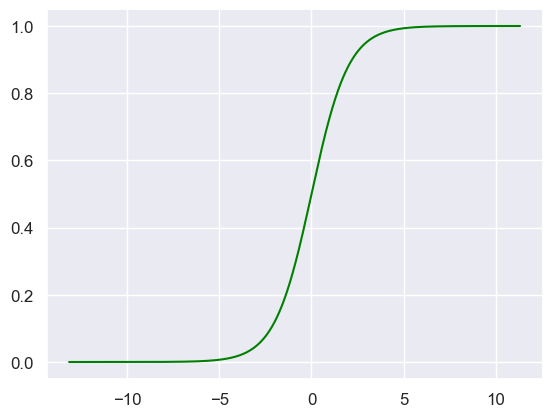

In [ ]:
z_test = np.dot(X_test, w) + b
z_sort = np.sort(z_test)
z_sorted = sigmoid(z_sort)

plt.plot(z_sort, z_sorted, color='green')

In [ ]:
# z_test = np.dot(X_test, w) + b
# probabilitas = sigmoid(z_test)

# plt.figure(figsize=(15, 12))
# plt.scatter(z_test, probabilitas, c=y_test, cmap='coolwarm', edgecolors='k', s=50, alpha=0.8)
# plt.axhline(0.5, color='black', linestyle='-', label='Batas Keputusan/Threshold = 0.5')
# plt.xlabel('Skor Logit (z)')
# plt.ylabel('Probabilitas (0 = Perempuan - 1 = Laki-Laki)')
# plt.title('Sebaran Prediksi Model (Biru = Perempuan | Merah = Laki-Laki)')
# plt.grid(True)
# plt.show()

## F. GUI

### F.1 Rumus Prediksi Logistic Regression

In [ ]:
def predict(X, w, b, threshold=0.5):
    # 1. Hitung probabilitas (sama kayak waktu training)
    z = linear_equation(X, w, b)
    y_prob = sigmoid(z)
    
    # 2. Ubah probabilitas jadi kelas (0 atau 1)
    # List comprehension: Kalau p > 0.5 jadi 1, selain itu 0
    y_class = [1 if p > threshold else 0 for p in y_prob]
    
    return np.array(y_class)

### F.2 GUI Tkinter

In [ ]:
import tkinter as tk
from tkinter import * 

#FUNGSI PREDIKSI
def prediksi():
    nama = input_nama.get()
    suffixes = suffix(nama)
    
    X_input = np.zeros(len(vocab))
    
    for s in suffixes:
        if s in vocab:
            X_input[vocab.index(s)] += 1
            
    z = linear_equation(X_input, w, b)
    y_prob = sigmoid(z)
    
    if y_prob > 0.5:
        hasil = f"Laki-Laki ({y_prob:.2f}%)"
        warna ="blue"
    else:
        hasil = f"Perempuan ({y_prob:.2f}%)"
        warna = "red"
        
    hasil_prediksi.config(text=hasil, fg=warna)


# GUI UTAMA
root = tk.Tk()
root_title = Label(text='AI Gender Predictor - Pemilu')
root.geometry("500x600")
root.configure(bg='lightblue')

header_frame = Frame(root, bg="#003468", pady=20)
header_frame.pack(fill='x')

Label(header_frame, text='Pemilu Gender Predictor', font=('Arial', 18, 'bold'), bg='#003468', fg='white').pack()
Label(header_frame, text='Model: Logistic Regression', font=('Arial', 10), bg='#003468', fg='white').pack()

main_frame = Frame(root, bg="#086594", pady=20, padx=20)
main_frame.pack(fill='both', expand=True)

Label(main_frame, text='Masukkan Nama Pemilih: ', font=('Arial', 12), bg='#086594',fg='white').pack()
input_nama = Entry(main_frame, font=('Arial', 12), bg='white',fg="#000000", justify='center')
input_nama.pack(padx=10, pady=20)

predict = Button(main_frame, command=prediksi, bg="#002574", fg='white', text='Prediksi Gender', font=('Arial', 14))
predict.pack(padx=30, pady=40)

hasil_prediksi = Label(root, text='-', font=('Arial', 14, 'bold'))
hasil_prediksi.pack(pady=40, padx=20)

root.mainloop()